<a href="https://colab.research.google.com/github/plajuan/ML_Study/blob/main/Penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solved Exercise

## Introduction

In this exercise, we intend to predict the body mass of penguins. To do this, we will consider several characteristics of the penguins, such as the culmen (beak) depth, flipper length and sex.

## Data

*   Number of observations = 344
*   Number of independent variables = 6
  1.   species = the species to which the penguin belongs
  1.   island = island where the penguin lives
  1.   culmen_length_mm = culmen (beak) length (mm)
  2.   culmen_depth_mm = culmen depth (mm)
  2.   flipper_length_mm = flipper length (mm)
  2.   sex = sex (*male* for male and *female* for female)
*   Number of dependent variables = 1
  1.   body_mass_g = body mass (gr)

Data availabe at:  https://raw.githubusercontent.com/pmarcelino/datasets/master/penguins.csv

**Note**: The dependent and independent variables are defined specifically using the information in the exercise's introduction. If in the introduction we were asked, for example, to predict the flipper length using the other variables, the dependent variable would be 'flipper_length' and not 'body_mass_g'.

## Example

The first observation in the dataset that we will see in the Solution - the first row in the table that appears after doing `df` - refers to a penguin that:

*   Is of the `Adelie` species
*   Lives on the `Torgersen` island
*   Has a beak with a length of `39.1` mm
*   Has a beak with a depth of `18.7` mm
*   Has flippers with a length of `181` mm
*   Has a body mass of `3750` grams
*   Is `MALE` (male)



# Solution

1.   Prepare data
2.   Explore data
1.   Train the model
2.   Evaluate the model

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

**Note**:  If `FutureWarning` appears while you are importing the libraries, do not worry. This message appears associated with a library and serves only to inform you that some changes are ocurring in that library.

## Prepare data

1.   Import data
2.   Remove observations with missing data

In [2]:
# Import data
url = 'https://raw.githubusercontent.com/pmarcelino/datasets/master/penguins.csv'
df = pd.read_csv(url)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


*   The import was successful
*   There is data missing in some of the observations (NaN)


In [ ]:
# Remove observations with missing data
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


*   The number of available observations has reduced to 333 (`333 rows`)
*   If the operation was performed well, we would only have complete observations (no missing data)



In [3]:
# Check for missing data
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


*   There are no variables with observations that have missing data
*   It is confirmed that we now only have complete observations (complete dataset)


## 2. Explore data

1.   Detect errors and anomalies
2.   View relationships between variables
  *   **Hypothesis**: `if a penguin has larger physical characteristics, then it will be of a larger size (and, consequently, its body mass will also be larger)`. If the hypothesis is true, detecting patterns in the physical characteristics of penguins can be a good way to predict their body mass.

In [ ]:
# Check for errors or anomalies
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


*   There do not seem to be any obvious errors or anomalies

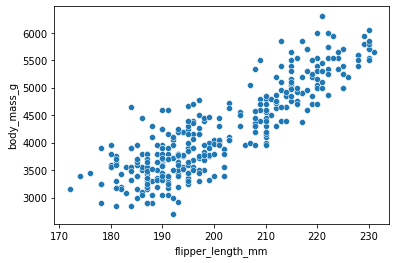

In [ ]:
# View relationship between flipper length and body mass
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)

*   There seems to be a relationship between the two variables
*   This relationship is linear because it appears to be possible to draw a straight line that relates both variables  
*   This relationship is positive because as one variable increases, the other also increases (penguins with larger flippers have a larger body mass)



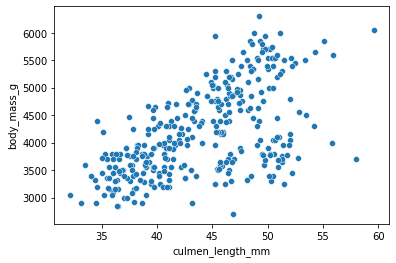

In [ ]:
# View relationship between beak length and body mass
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', data=df)

*   There seems to be a relationship between the two variables
*   It is not entirely clear that the relationship is linear
*   The relationship appears to be positive, as there is a tendency for penguins with a longer beak to have a larger body mass

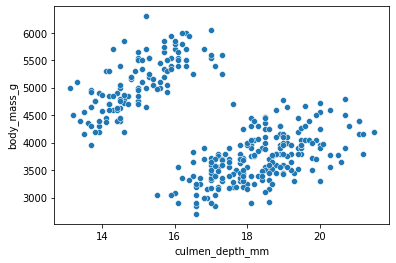

In [ ]:
# View relationship between beak depth and body mass
sns.scatterplot(x='culmen_depth_mm', y='body_mass_g', data=df)

*   The data appears to be divided into two groups
*   Both groups tend to have a linear and positive relationship
*   Challenge: draw the last scatter plot, identifying the species

**Conclusions drawn from the data exploration**

*   There do not seem to be any obvious errors or anomalies
*   The initial hypothesis seems to hold and it is possible to use the penguins' physical characteristics to predict their body mass.


## 3. Train the model

1.   Prepare the data in order to apply the algorithm
  *   Define the independent and dependent variables
  *   Split the data into training and testing datasets
1.   Define the algorithm to be used to train the model
  *   Use a model that is suitable for a **regression** problem
2.   Train the model with the defined algorithm






In [ ]:
# Define the independent and dependent variables
X = df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']]
y = df['body_mass_g']

*   We will only be using the variables that we have already observed to be related to body mass
*   To train the model, all the independent variables must be numerical

In [ ]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

*   This function randomly splits the data between the training and testing datasets
*   In order for this division to always be equal, we define the `random_state` argument
*   That way, if anyone were to run code that is exactly the same as ours, they would get the same results
*   We used the number 37, but we could have used any other number.

In [ ]:
# Define the algorithm of the model
model = RandomForestRegressor(random_state=37)

*   We defined `random_state` for the reasons mentioned above
*   Since this is a regression problem, the Random Forest algorithm version we will be using must be suitable for regressions (`RandomForestRegressor` instead of `RandomForestClassifier`)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

## 4. Evaluate the model

1.   Make predictions
2.   Evaluate the model based on the predictions made
  *   Use an evaluation metric that is suitable for a **regression** problem
  *   The coefficient of determination (R2) is a suitable metric for most regression problems

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using the coefficient of determination
r2_score(y_test, y_pred)

0.8568411326046628

*   The coefficient of determination value (`r2_score`) is approximately 0.86.
*   As the value is close to 1, we can say that the model has a good predictive capacity